<a href="https://colab.research.google.com/github/ayumitakayuki/Metodologi-Penelitian/blob/main/Code_Python_UAS_MetodologiPenelitian_20220801127_AyumiPermana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install xgboost
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

from google.colab import files
uploaded = files.upload()

Saving data_dummy_iklim_riau.xlsx to data_dummy_iklim_riau.xlsx


In [ ]:
# Generate data dummy
dates = pd.date_range(start='2023-01-01', end='2024-12-31', freq='D')
stations = ['Stasiun Pekanbaru', 'Stasiun Rengat', 'Stasiun Dumai']
df = pd.DataFrame([(date, s) for date in dates for s in stations], columns=['date', 'station_name'])

In [ ]:
# Ekstrak waktu
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

In [ ]:
# Tambahkan fitur dan target
np.random.seed(42)
df['Tx'] = 30 + 5 * np.sin(2 * np.pi * df['month'] / 12) + np.random.normal(0, 1, size=len(df))
df['RH_avg'] = 85 - 10 * np.sin(2 * np.pi * df['month'] / 12) + np.random.normal(0, 2, size=len(df))
df['RR'] = np.abs(np.random.normal(5, 5, len(df)))
df['ss'] = np.random.uniform(4, 10, len(df))
df['ff_x'] = np.random.uniform(0.5, 3, len(df))

In [ ]:
# Encode nama stasiun
le = LabelEncoder()
df['station_encoded'] = le.fit_transform(df['station_name'])

# Fitur & Target
features = ['year', 'month', 'day', 'station_encoded', 'RR', 'ss', 'ff_x']
X = df[features]
y_tx = df['Tx']
y_rh = df['RH_avg']


In [ ]:
# Split untuk suhu
X_train_tx, X_test_tx, y_train_tx, y_test_tx = train_test_split(X, y_tx, test_size=0.2, random_state=42)
model_tx = XGBRegressor()
model_tx.fit(X_train_tx, y_train_tx)

# Split untuk kelembapan
X_train_rh, X_test_rh, y_train_rh, y_test_rh = train_test_split(X, y_rh, test_size=0.2, random_state=42)
model_rh = XGBRegressor()
model_rh.fit(X_train_rh, y_train_rh)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Suhu
pred_tx = model_tx.predict(X_test_tx)
rmse_tx = mean_squared_error(y_test_tx, pred_tx)
r2_tx = r2_score(y_test_tx, pred_tx)

# Kelembapan
pred_rh = model_rh.predict(X_test_rh)
rmse_rh = mean_squared_error(y_test_rh, pred_rh)
r2_rh = r2_score(y_test_rh, pred_rh)

print("Suhu Maksimum:")
print("RMSE:", rmse_tx)
print("R²:", r2_tx)

print("Kelembapan Minimum:")
print("RMSE:", rmse_rh)
print("R²:", r2_rh)

Suhu Maksimum:
RMSE: 1.261381389750602
R²: 0.9087067605292215
Kelembapan Minimum:
RMSE: 5.338072753089098
R²: 0.8987276313299697


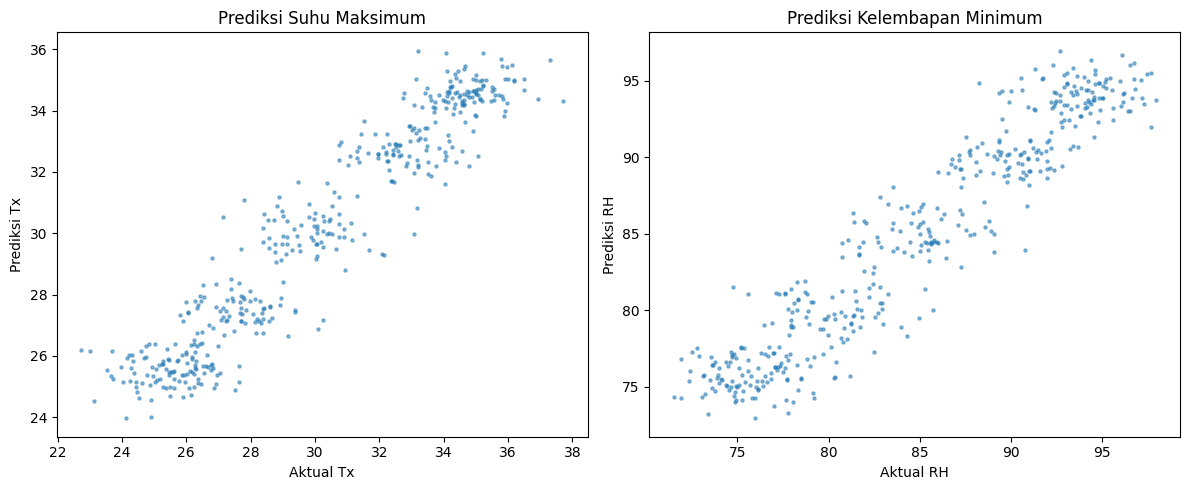

In [ ]:
plt.figure(figsize=(12, 5))

# Suhu
plt.subplot(1, 2, 1)
plt.scatter(y_test_tx, pred_tx, s=5, alpha=0.5)
plt.xlabel("Aktual Tx")
plt.ylabel("Prediksi Tx")
plt.title("Prediksi Suhu Maksimum")

# Kelembapan
plt.subplot(1, 2, 2)
plt.scatter(y_test_rh, pred_rh, s=5, alpha=0.5)
plt.xlabel("Aktual RH")
plt.ylabel("Prediksi RH")
plt.title("Prediksi Kelembapan Minimum")

plt.tight_layout()
plt.show()